<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Image_Processing/blob/main/Face_Detection_Using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

faces.DESCR

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\ni

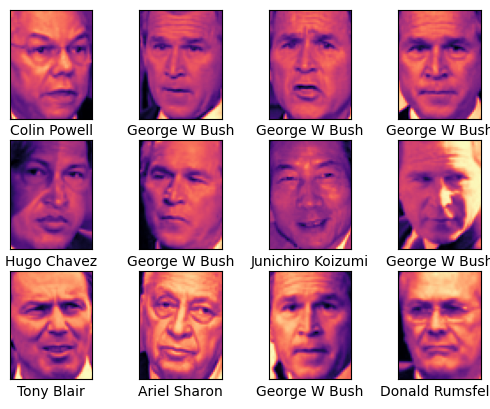

In [3]:
import matplotlib.pyplot as plt

fig, splts = plt.subplots(3, 4)
for i, splts in enumerate(splts.flat):
    splts.imshow(faces.images[i], cmap='magma')
    splts.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [4]:
from sklearn.model_selection import train_test_split

X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [7]:
X

array([[0.53464055, 0.5254902 , 0.49673203, ..., 0.00653595, 0.00653595,
        0.00261438],
       [0.28627452, 0.20784314, 0.2522876 , ..., 0.96993464, 0.9490196 ,
        0.9346406 ],
       [0.31895426, 0.39215687, 0.275817  , ..., 0.4261438 , 0.7908497 ,
        0.9555555 ],
       ...,
       [0.11633987, 0.11111111, 0.10196079, ..., 0.5686274 , 0.5803922 ,
        0.5542484 ],
       [0.19346406, 0.21176471, 0.2901961 , ..., 0.6862745 , 0.654902  ,
        0.5908497 ],
       [0.12287582, 0.09803922, 0.10980392, ..., 0.12941177, 0.1633987 ,
        0.29150328]], dtype=float32)

In [8]:
y


array([1, 3, 3, ..., 7, 3, 5])

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# For dimensionality reduction
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [10]:
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

In [11]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)

accuracy_score(predictions, y_test)

0.8074074074074075

In [13]:
pip install colorama

In [14]:
from colorama import Fore

incorrect = 0

length = len(predictions)

print("Actual\t\t\t\tPredicted\n")

for i in range(len(predictions)):
    if predictions[i] != y_test[i]: # if predictions and actual values are not equal
        prediction_name = faces.target_names[predictions[predictions[i]]] # Getting the predicted name
        actual_name = faces.target_names[y_test[y_test[i]]] # Getting the actual name
        incorrect+=1
        print("{}\t\t\t{}".format(Fore.GREEN + actual_name, Fore.RED+prediction_name))

print("{} are classified as correct and {} are classified as incorrect!".format(length-incorrect, incorrect))

Actual				Predicted

Junichiro Koizumi			Junichiro Koizumi
George W Bush			George W Bush
Junichiro Koizumi			George W Bush
Colin Powell			Junichiro Koizumi
George W Bush			Junichiro Koizumi
Colin Powell			Junichiro Koizumi
Colin Powell			George W Bush
George W Bush			Junichiro Koizumi
George W Bush			George W Bush
George W Bush			Junichiro Koizumi
Junichiro Koizumi			George W Bush
Colin Powell			Junichiro Koizumi
Junichiro Koizumi			George W Bush
Colin Powell			George W Bush
Junichiro Koizumi			George W Bush
George W Bush			George W Bush
George W Bush			Junichiro Koizumi
Junichiro Koizumi			George W Bush
George W Bush			George W Bush
Junichiro Koizumi			George W Bush
Junichiro Koizumi			George W Bush
George W Bush			George W Bush
George W Bush			Junichiro Koizumi
Junichiro Koizumi			George W Bush
George W Bush			Junichiro Koizumi
Junichiro Koizumi			George W Bush
George W Bush			Junichiro Koizumi
George W Bush			George W Bush
George W Bush			George W Bush
Gerhard Schroeder			George W B

In [15]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test, digits=2))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        17
           1       0.94      0.67      0.78       150
           2       0.78      0.93      0.85        42
           3       0.89      0.83      0.86       220
           4       0.72      0.82      0.77        34
           5       0.38      1.00      0.55        13
           6       0.76      1.00      0.86        16
           7       0.68      0.85      0.76        48

    accuracy                           0.81       540
   macro avg       0.73      0.87      0.77       540
weighted avg       0.84      0.81      0.81       540



In [16]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(predictions, y_test)

matrix

array([[ 15,   1,   1,   0,   0,   0,   0,   0],
       [  4, 101,   4,  20,   3,   8,   1,   9],
       [  2,   0,  39,   1,   0,   0,   0,   0],
       [  2,   4,   5, 183,   5,   7,   4,  10],
       [  0,   0,   0,   1,  28,   5,   0,   0],
       [  0,   0,   0,   0,   0,  13,   0,   0],
       [  0,   0,   0,   0,   0,   0,  16,   0],
       [  0,   2,   1,   0,   3,   1,   0,  41]])